In [21]:
semeion <- read.table("C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//ADS_FINAL//Data_Semeion//semeion.txt", 
                  header = TRUE)

In [22]:
head(df)

X0.0000,X0.0000.1,X0.0000.2,X0.0000.3,X0.0000.4,X0.0000.5,X1.0000,X1.0000.1,X1.0000.2,X1.0000.3,...,X1,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8
0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [34]:
set.seed(101) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(df), size = floor(.80*nrow(df)), replace = F)
train <- semeion[sample, ]
test  <- semeion[-sample, ]

In [35]:
nrow(train)
nrow(test)

[1] 1273

[1] 319

In [36]:
library(data.table)


mydat <- fread('https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data')
head(mydat)

semeion<-mydat[,1:256]
dataVal<-mydat[,257:266]



Warning message:
"package 'data.table' was built under R version 3.4.2"

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266
0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [78]:
semeion[,which(is.na(semeion))]

integer(0)

In [51]:

semeion$digit <- NA
semeion$digit[which(mydat$V257 == 1)] <- 0
semeion$digit[which(mydat$V258 == 1)] <- 1
semeion$digit[which(mydat$V259 == 1)] <- 2
semeion$digit[which(mydat$V260 == 1)] <- 3
semeion$digit[which(mydat$V261 == 1)] <- 4
semeion$digit[which(mydat$V262 == 1)] <- 5
semeion$digit[which(mydat$V263 == 1)] <- 6
semeion$digit[which(mydat$V264 == 1)] <- 7
semeion$digit[which(mydat$V265 == 1)] <- 8
semeion$digit[which(mydat$V266 == 1)] <- 9
#semeion


#dataVal

#labels(semeion)

set.seed(101) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 80% of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(semeion), size = floor(.80*nrow(semeion)), replace = F)
CNN_Ttrain <- semeion[sample, ]
CNN_Ttest  <- semeion[-sample, ]



X_Train<-CNN_Ttrain[, -257]
Y_Train<-CNN_Ttrain[, 257]



X_Test<-CNN_Ttest[, -257]
Y_Test<-CNN_Ttest[, 257]

In [197]:
library(reshape2)
sapply(Y_Train, function(x) sum(is.na(x)))

digit 
    0

In [274]:
# reshape
head(Y_Train)
dim(Y_Train)
#dim(X_Train) <- c(nrow(X_Train),dim(X_Train)[2])
Y_Train <- data.matrix(Y_Train)

digit
9
3
8
6
9
3


[1] 1274    1

In [199]:
ncol(X_Train)
dim(X_Train)[2]

[1] 256

[1] 256

In [38]:
library(keras)

Warning message:
"package 'keras' was built under R version 3.4.3"

In [188]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 128, activation = "relu", input_shape = dim(X_Train)[2]) %>%
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = "softmax")

In [189]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_64 (Dense)                    (None, 128)                     32896       
________________________________________________________________________________
dropout_29 (Dropout)                (None, 128)                     0           
________________________________________________________________________________
dense_65 (Dense)                    (None, 64)                      8256        
________________________________________________________________________________
dropout_30 (Dropout)                (None, 64)                      0           
________________________________________________________________________________
dense_66 (Dense)                    (None, 10)                      650         
Total params: 41,802
Trainable params: 41,802
Non-trainable params: 0
_______________________________________

In [194]:
model %>% compile(
  loss = "sparse_categorical_crossentropy" ,      #"categorical_crossentropy"
  optimizer = 'adam',   # optimizer_rmsprop(),
  metrics = c("accuracy")
)

# tuning the model by using epoch =1000 and batch_size = 5

In [200]:
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 1000, batch_size = 5, 
  validation_split = 0.2
)

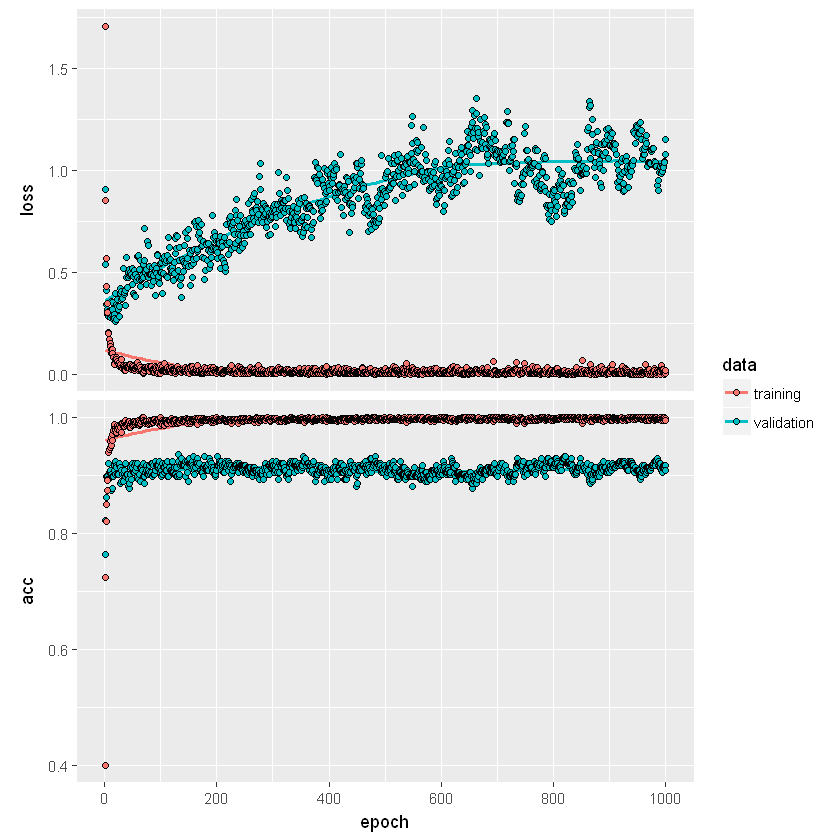

In [201]:
plot(history)

In [275]:
#before running the model need to convert data to matrix form for keras model
X_Test <- data.matrix(X_Test)
Y_Test <- data.matrix(Y_Test)

In [206]:
model %>% evaluate(X_Test, Y_Test,verbose = 1)

$loss
[1] 0.717423

$acc
[1] 0.9310345

In [208]:
predicted_Y_Test <- model %>% predict_classes(X_Test)

In [210]:
table(predicted_Y_Test, Y_Test)

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 25  0  0  1  0  0  0  0  0
               2  0  0 27  0  0  0  0  1  0  0
               3  0  0  0 29  0  0  0  0  0  2
               4  0  0  0  0 30  0  0  1  1  0
               5  0  1  0  6  0 30  0  0  0  0
               6  0  0  0  0  1  2 23  0  1  0
               7  0  0  0  0  0  0  0 35  0  0
               8  0  0  0  0  0  0  0  0 29  0
               9  0  0  0  2  0  0  0  2  1 29

In [ ]:
#tunning by using epochs= 200 and batch_size = 30

In [211]:
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 200, batch_size = 30, 
  validation_split = 0.2
)

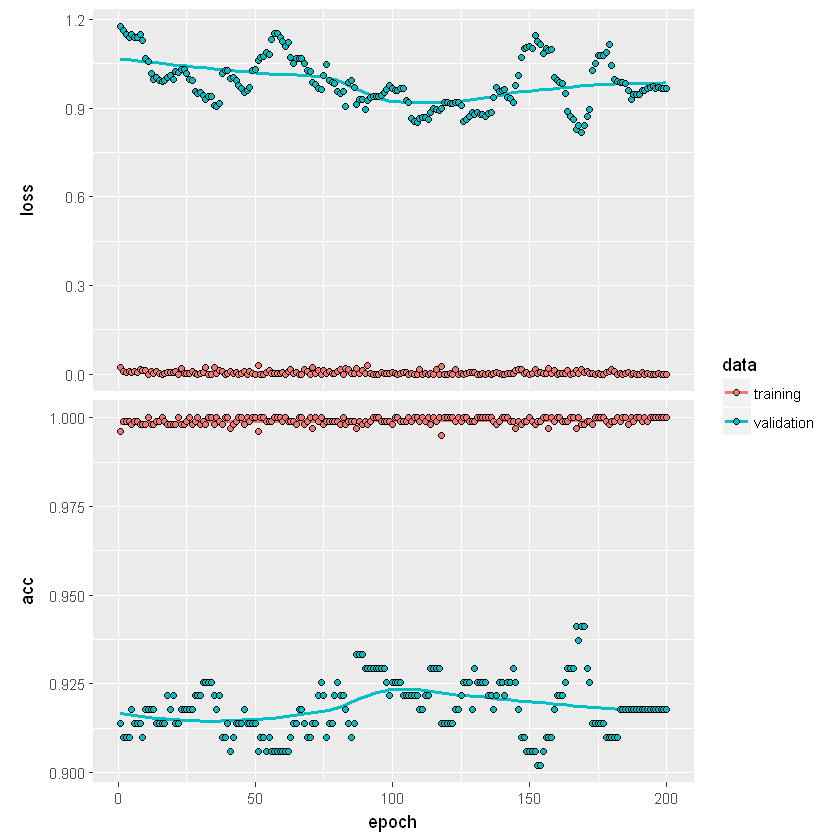

In [212]:
plot(history)

In [213]:
model %>% evaluate(X_Test, Y_Test,verbose = 1)

$loss
[1] 0.6848041

$acc
[1] 0.9404389

In [214]:
predicted_Y_Test <- model %>% predict_classes(X_Test)
table(predicted_Y_Test, Y_Test)

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 25  0  0  1  0  0  0  1  1
               2  0  0 27  0  0  0  0  2  0  0
               3  0  0  0 32  0  0  0  0  1  2
               4  0  0  0  0 30  0  0  2  0  0
               5  0  1  0  4  0 31  0  0  0  1
               6  0  0  0  0  0  1 23  0  0  0
               7  0  0  0  0  1  0  0 35  0  0
               8  0  0  0  0  0  0  0  0 30  0
               9  0  0  0  1  0  0  0  0  0 27

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_218 (Dense)                   (None, 256)                     65792       
________________________________________________________________________________
dropout_121 (Dropout)               (None, 256)                     0           
________________________________________________________________________________
dense_219 (Dense)                   (None, 128)                     32896       
________________________________________________________________________________
dropout_122 (Dropout)               (None, 128)                     0           
________________________________________________________________________________
dense_220 (Dense)                   (None, 10)                      1290        
Total params: 99,978
Trainable params: 99,978
Non-trainable params: 0
_______________________________________

$loss
[1] 0.2187111

$acc
[1] 0.9529781

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 25  0  2  2  0  0  0  0  0
               2  0  0 27  0  0  0  0  0  1  0
               3  0  0  0 31  0  0  0  0  0  2
               4  0  0  0  0 30  1  0  0  0  0
               5  0  1  0  4  0 30  0  0  0  0
               6  0  0  0  0  0  1 23  1  0  0
               7  0  0  0  0  0  0  0 38  0  0
               8  0  0  0  0  0  0  0  0 31  0
               9  0  0  0  0  0  0  0  0  0 29

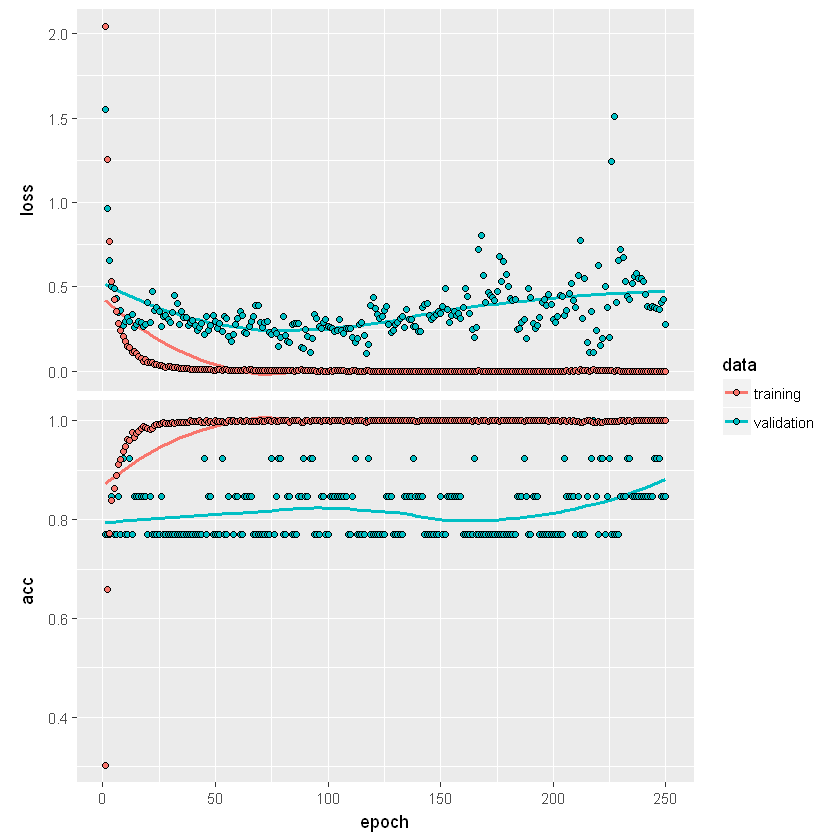

In [294]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape =  dim(X_Train)[2]) %>% 
  layer_dropout(rate = 0.2) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 10, activation = 'softmax')
summary(model)
model %>% compile(
  loss = "sparse_categorical_crossentropy" ,      #"categorical_crossentropy"
  optimizer = 'adam',   # optimizer_rmsprop(),
  metrics = c("accuracy")
)
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 250, batch_size = 125, 
  validation_split = 0.01,
    verbose= 2,
    shuffle='True'
)
plot(history)
model %>% evaluate(X_Test, Y_Test,verbose = 1)
predicted_Y_Test <- model %>% predict_classes(X_Test)
table(predicted_Y_Test, Y_Test)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_278 (Dense)                   (None, 256)                     65792       
________________________________________________________________________________
dropout_161 (Dropout)               (None, 256)                     0           
________________________________________________________________________________
dense_279 (Dense)                   (None, 128)                     32896       
________________________________________________________________________________
dropout_162 (Dropout)               (None, 128)                     0           
________________________________________________________________________________
dense_280 (Dense)                   (None, 10)                      1290        
Total params: 99,978
Trainable params: 99,978
Non-trainable params: 0
_______________________________________

$loss
[1] 0.1972779

$acc
[1] 0.9435737

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 25  0  2  2  0  0  1  0  1
               2  0  0 27  0  0  0  0  0  1  0
               3  0  0  0 30  0  0  0  0  0  2
               4  0  0  0  0 29  0  0  0  0  0
               5  0  1  0  5  0 32  1  0  0  0
               6  0  0  0  0  0  0 22  0  0  0
               7  0  0  0  0  1  0  0 38  0  0
               8  0  0  0  0  0  0  0  0 30  0
               9  0  0  0  0  0  0  0  0  1 28

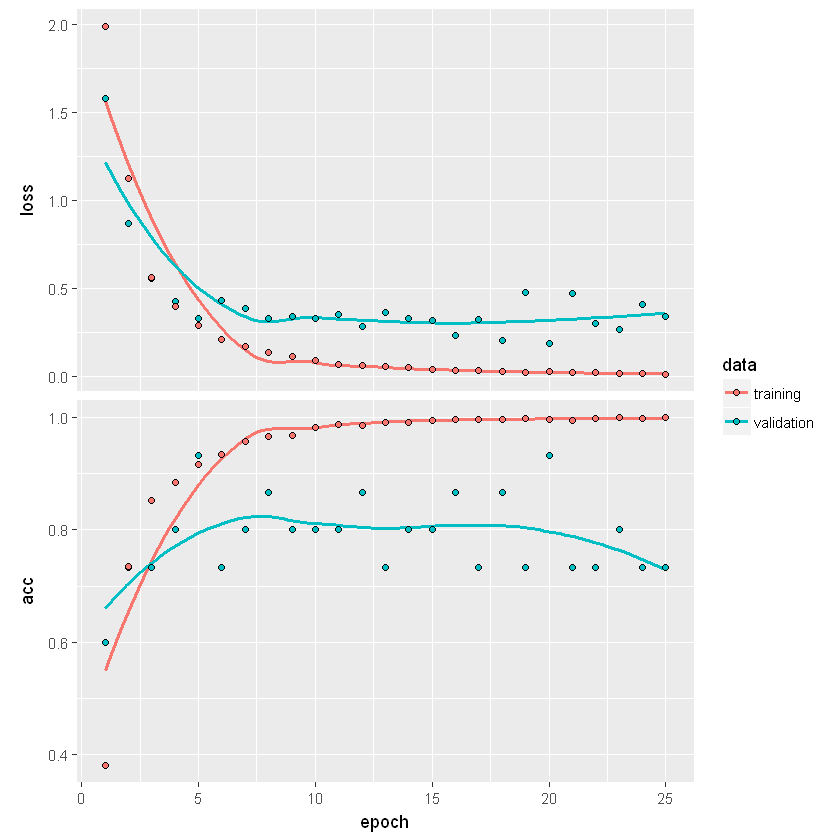

In [318]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape =  dim(X_Train)[2]) %>% 
  layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 10, activation = 'softmax')
summary(model)
model %>% compile(
  loss = "sparse_categorical_crossentropy" ,      #"categorical_crossentropy"
  optimizer = 'adam',   # optimizer_rmsprop(),
  metrics = c("accuracy")
)
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 25, batch_size = 128, 
  validation_split = 0.011,
 verbose = 2,
    shuffle="True"
)
plot(history)
model %>% evaluate(X_Test, Y_Test,verbose = 1)
predicted_Y_Test <- model %>% predict_classes(X_Test)
table(predicted_Y_Test, Y_Test)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_316 (Dense)                   (None, 1024)                    263168      
________________________________________________________________________________
dropout_191 (Dropout)               (None, 1024)                    0           
________________________________________________________________________________
dense_317 (Dense)                   (None, 512)                     524800      
________________________________________________________________________________
dropout_192 (Dropout)               (None, 512)                     0           
________________________________________________________________________________
dense_318 (Dense)                   (None, 256)                     131328      
________________________________________________________________________________
dropout_193 (Dropout)       

$loss
[1] 0.2254804

$acc
[1] 0.9623824

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 26  0  1  1  0  0  1  0  0
               2  0  0 27  0  0  0  0  0  1  0
               3  0  0  0 31  0  0  0  0  0  0
               4  0  0  0  0 29  0  0  0  0  0
               5  0  0  0  1  0 31  0  0  0  0
               6  0  0  0  0  1  1 23  0  0  0
               7  0  0  0  0  1  0  0 38  0  0
               8  0  0  0  0  0  0  0  0 31  0
               9  0  0  0  4  0  0  0  0  0 31

[1] "--------------------------------------------------------------------------------------"


[1] "Total run time for Keras model 2.22246666749318  seconds"

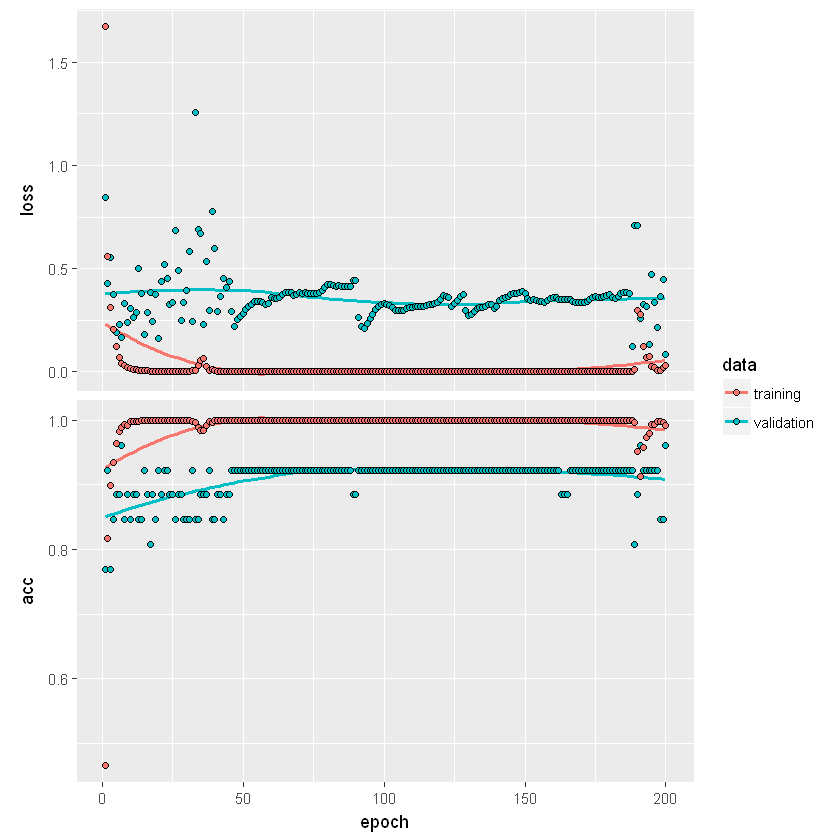

In [331]:
#calculating time to measure the model run time using KERAS
start_time <- Sys.time()
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 1024, activation = 'relu', input_shape =  dim(X_Train)[2]) %>% 
  layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 512, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 256, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 10, activation = 'softmax')
summary(model)
model %>% compile(
  loss = "sparse_categorical_crossentropy" ,      #"categorical_crossentropy"
  optimizer = 'adam',   # optimizer_rmsprop(),
  metrics = c("accuracy")
)
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 200, batch_size = 128, 
  validation_split = 0.02,
 verbose = 2,
    shuffle="True"
)
plot(history)
model %>% evaluate(X_Test, Y_Test,verbose = 1)
predicted_Y_Test <- model %>% predict_classes(X_Test)
table(predicted_Y_Test, Y_Test)

end_time <- Sys.time()

run_time <- end_time - start_time
print("--------------------------------------------------------------------------------------")
paste("Total run time for Keras model", run_time, " seconds")

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_356 (Dense)                   (None, 1024)                    263168      
________________________________________________________________________________
dropout_223 (Dropout)               (None, 1024)                    0           
________________________________________________________________________________
dense_357 (Dense)                   (None, 512)                     524800      
________________________________________________________________________________
dropout_224 (Dropout)               (None, 512)                     0           
________________________________________________________________________________
dense_358 (Dense)                   (None, 256)                     131328      
________________________________________________________________________________
dropout_225 (Dropout)       

$loss
[1] 0.286385

$acc
[1] 0.9435737

                Y_Test
predicted_Y_Test  0  1  2  3  4  5  6  7  8  9
               0 40  0  0  0  0  0  0  0  0  0
               1  0 25  0  1  1  0  0  1  0  1
               2  0  1 26  0  0  0  0  1  1  0
               3  0  0  0 33  0  0  0  1  0  1
               4  0  0  0  0 30  0  0  1  0  0
               5  0  0  0  2  0 31  1  0  0  0
               6  0  0  0  0  1  1 22  0  0  0
               7  0  0  1  0  0  0  0 35  0  0
               8  0  0  0  0  0  0  0  0 31  1
               9  0  0  0  1  0  0  0  0  0 28

[1] "--------------------------------------------------------------------------------------"


[1] "Total run time for Keras model 2.06365618308385  seconds"

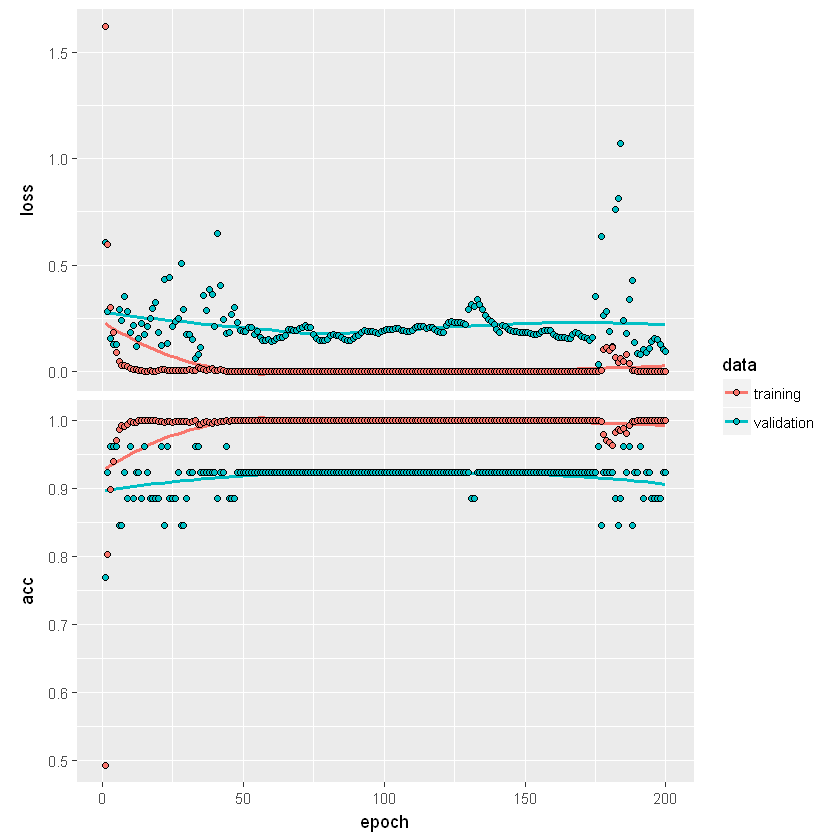

In [339]:
#calculating time to measure the model run time using KERAS
start_time <- Sys.time()
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 1024, activation = 'relu', input_shape =  dim(X_Train)[2]) %>% 
  layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 512, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 256, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 10, activation = 'softmax')
summary(model)
model %>% compile(
  loss = "sparse_categorical_crossentropy" ,      #"categorical_crossentropy"
  optimizer = 'adam',   # optimizer_rmsprop(),
  metrics = c("accuracy")
)
history <- model %>% fit(
  X_Train, Y_Train,
  epochs = 200, batch_size = 129, 
  validation_split = 0.02,
 verbose = 2,
    shuffle="True"
)
plot(history)
model %>% evaluate(X_Test, Y_Test,verbose = 1)
predicted_Y_Test <- model %>% predict_classes(X_Test)
table(predicted_Y_Test, Y_Test)

end_time <- Sys.time()

run_time <- end_time - start_time
print("--------------------------------------------------------------------------------------")
paste("Total run time for Keras model", run_time, " seconds")

In [286]:
library('forecast')


In [327]:
predicted <- data.frame(predicted_Y_Test)
actual <- data.frame(Y_Test)
error <- predicted - actual
rmse <- sqrt(mean(error^2))
mae <- mean(abs(error))

Warning message in mean.default(abs(error)):
"argument is not numeric or logical: returning NA"

In [328]:
rmse

[1] 0.9921321

In [319]:
ls()


[1] "actual"           "char_Data"        "CNN_Ttest"        "CNN_Ttrain"      
 [5] "data"             "dataVal"          "df"               "error"           
 [9] "f"                "history"          "mae"              "model"           
[13] "mydat"            "predicted"        "predicted_Y_Test" "rmse"            
[17] "sample"           "semeion"          "test"             "train"           
[21] "X_Test"           "X_Train"          "Y_Test"           "Y_Train"